In [126]:
#%% Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [157]:
# Load the Parkinson's dataset to examine its structure
file_path = 'parkinsons_updrs.csv'
parkinsons_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
parkinsons_data.head()


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [158]:
parkinsons_data.describe().T

,count,mean,std,min,25%,50%,75%,max
subject#,5875.0,21.494128,12.372279,1.000000,10.000000,22.000000,33.000000,42.000000
age,5875.0,64.804936,8.821524,36.000000,58.000000,65.000000,72.000000,85.000000
sex,5875.0,0.317787,0.465656,0.000000,0.000000,0.000000,1.000000,1.000000
test_time,5875.0,92.863722,53.445602,-4.262500,46.847500,91.523000,138.445000,215.490000
motor_UPDRS,5875.0,21.296229,8.129282,5.037700,15.000000,20.871000,27.596500,39.511000
total_UPDRS,5875.0,29.018942,10.700283,7.000000,21.371000,27.576000,36.399000,54.992000
Jitter(%),5875.0,0.006154,0.005624,0.000830,0.003580,0.004900,0.006800,0.099990
Jitter(Abs),5875.0,0.000044,0.000036,0.000002,0.000022,0.000035,0.000053,0.000446
Jitter:RAP,5875.0,0.002987,0.003124,0.000330,0.001580,0.002250,0.003290,0.057540
Jitter:PPQ5,5875.0,0.003277,0.003732,0.000430,0.001820,0.002490,0.003460,0.069560


In [159]:
# Selecting the relevant columns for regressors and the target variable
relevant_columns = [
    'sex', 'test_time', 'motor_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 
    'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 
    'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 
    'NHR', 'HNR', 'RPDE', 'DFA', 'PPE', 'total_UPDRS'
]

# Filter the dataset to include only these columns
filtered_data = parkinsons_data[relevant_columns]

# Check for missing values in the filtered dataset
missing_values = filtered_data.isnull().sum()

# Display a summary of missing values and dataset shape
filtered_data_shape = filtered_data.shape
missing_values_summary = missing_values[missing_values > 0]

filtered_data_shape, missing_values_summary


((5875, 20), Series([], dtype: int64))

In [160]:
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training (50%), validation (25%), and test (25%) sets
train_data, test_data = train_test_split(filtered_data, test_size=0.5, random_state=42)
validation_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

# Verify the splits
train_size = train_data.shape[0]
validation_size = validation_data.shape[0]
test_size = test_data.shape[0]

train_size, validation_size, test_size


(2937, 1469, 1469)

In [ ]:
# Calculate the mean and standard deviation of each feature in the training set (excluding the target variable)
features = [col for col in filtered_data.columns if col != 'total_UPDRS']
means = train_data[features].mean()
stds = train_data[features].std()

# Normalize the training, validation, and test sets using the calculated means and standard deviations
train_data_norm = train_data.copy()
validation_data_norm = validation_data.copy()
test_data_norm = test_data.copy()

# Normalize the training, validation, and test sets using the calculated means and standard deviations
train_data_norm[features] = (train_data[features] - means) / stds
validation_data_norm[features] = (validation_data[features] - means) / stds
test_data_norm[features] = (test_data[features] - means) / stds

# Verify the normalization by checking the mean and std of the normalized training data
normalized_means = train_data_norm[features].mean()
normalized_stds = train_data_norm[features].std()

normalized_means, normalized_stds


(sex             -1.112869e-16
 test_time       -1.076580e-16
 motor_UPDRS      1.209640e-16
 Jitter(%)       -2.128967e-16
 Jitter(Abs)      1.959617e-16
 Jitter:RAP      -6.290130e-17
 Jitter:PPQ5     -3.991813e-17
 Jitter:DDP      -1.633014e-17
 Shimmer          2.370895e-16
 Shimmer(dB)      5.322417e-17
 Shimmer:APQ3     4.838561e-18
 Shimmer:APQ5     5.080489e-17
 Shimmer:APQ11   -3.628921e-18
 Shimmer:DDA     -7.499770e-17
 NHR             -8.346518e-17
 HNR              2.794269e-16
 RPDE             6.489720e-16
 DFA             -1.542291e-17
 PPE              3.725692e-16
 dtype: float64,
 sex              1.0
 test_time        1.0
 motor_UPDRS      1.0
 Jitter(%)        1.0
 Jitter(Abs)      1.0
 Jitter:RAP       1.0
 Jitter:PPQ5      1.0
 Jitter:DDP       1.0
 Shimmer          1.0
 Shimmer(dB)      1.0
 Shimmer:APQ3     1.0
 Shimmer:APQ5     1.0
 Shimmer:APQ11    1.0
 Shimmer:DDA      1.0
 NHR              1.0
 HNR              1.0
 RPDE             1.0
 DFA              1.

In [162]:
# Extract the target variable (total_UPDRS) and features for each dataset
X_train_norm = train_data_norm[features].values
y_train_norm = train_data_norm['total_UPDRS'].values

X_val_norm = validation_data_norm[features].values
y_val_norm = validation_data_norm['total_UPDRS'].values

X_test_norm = test_data_norm[features].values
y_test_norm = test_data_norm['total_UPDRS'].values

# Verify the shapes of the feature matrices and target vectors
X_train_norm.shape, y_train_norm.shape, X_val_norm.shape, y_val_norm.shape, X_test_norm.shape, y_test_norm.shape


((2937, 19), (2937,), (1469, 19), (1469,), (1469, 19), (1469,))

In [163]:
import numpy as np

# Define N and select the first validation point
N = 10
x_val = X_val_norm[0]  # First validation point

# Calculate the Euclidean distance from the validation point to all training points
distances = np.linalg.norm(X_train_norm - x_val, axis=1)

# Find the indices of the N-1 closest points in the training set
closest_indices = np.argsort(distances)[:N-1]

# Retrieve the N-1 closest training points and add the validation point as the last row
Xr = np.vstack((X_train_norm[closest_indices], x_val))

# Display the resulting matrix Xr
Xr.shape, Xr


((10, 19),
 array([[ 1.48511975,  1.52767279,  0.03831361, -0.59153876, -0.87957997,
         -0.45775277, -0.46402216, -0.45890981, -0.26058406, -0.3733552 ,
         -0.15346848, -0.24336206, -0.37371721, -0.15345964, -0.45102578,
          0.71776665,  0.33047596, -0.61401914, -1.16403573],
        [ 1.48511975,  1.30896341,  0.10188896, -0.66711183, -0.87986584,
         -0.62974851, -0.52639983, -0.6297821 , -0.30145524, -0.27255821,
         -0.24455419, -0.26701693, -0.31451325, -0.24429603, -0.44414222,
          0.40387072,  0.19627613, -0.02397231, -0.73346057],
        [ 1.48511975,  1.00463958,  0.63855765, -0.71687947, -0.96333906,
         -0.57916153, -0.54908263, -0.57919491, -0.62492142, -0.68451115,
         -0.55290174, -0.58059561, -0.77784859, -0.55313974, -0.48838871,
          0.96084317, -0.47402667, -0.27877804, -1.40647066],
        [ 1.48511975,  0.65694774, -0.54667723, -0.52518192, -0.6074344 ,
         -0.52520208, -0.46402216, -0.52523524, -0.2387861 , -0

### Goal

We want to regress total UPDRS from the regressors (initially only motor UPDRS, age, PPE) using
Gaussian processes

In [164]:
# Define the initial hyperparameters
r2 = 100  # Autocorrelation hyperparameter
theta = 1  # Signal variance
s2_nu = 0.001  # Noise variance

# Build the covariance matrix R_Y,N
def compute_covariance_matrix(X, r2, theta, s2_nu):
    """
    Compute the covariance matrix R_Y,N for Gaussian process regression.
    """
    N = X.shape[0]
    covariance_matrix = np.zeros((N, N))
    for n in range(N):
        for k in range(N):
            # Gaussian kernel function
            covariance_matrix[n, k] = theta * np.exp(-np.linalg.norm(X[n] - X[k])**2 / (2 * r2))
    # Add noise variance to the diagonal
    np.fill_diagonal(covariance_matrix, covariance_matrix.diagonal() + s2_nu)
    return covariance_matrix

# Compute the covariance matrix for Xr
R_Y_N = compute_covariance_matrix(Xr, r2, theta, s2_nu)

# Display the resulting covariance matrix
R_Y_N.shape, R_Y_N


((10, 10),
 array([[1.001     , 0.99599385, 0.98808261, 0.99174563, 0.98871965,
         0.98981722, 0.98562437, 0.99145242, 0.98705441, 0.99558594],
        [0.99599385, 1.001     , 0.98781058, 0.99252842, 0.99036575,
         0.98844045, 0.98510845, 0.99778979, 0.9818744 , 0.99112824],
        [0.98808261, 0.98781058, 1.001     , 0.98323977, 0.99716175,
         0.99517548, 0.975301  , 0.98496702, 0.99446527, 0.99042009],
        [0.99174563, 0.99252842, 0.98323977, 1.001     , 0.98956523,
         0.98048384, 0.99138342, 0.98726316, 0.98287673, 0.98995191],
        [0.98871965, 0.99036575, 0.99716175, 0.98956523, 1.001     ,
         0.99515102, 0.98371045, 0.98752597, 0.99041477, 0.9896251 ],
        [0.98981722, 0.98844045, 0.99517548, 0.98048384, 0.99515102,
         1.001     , 0.97941742, 0.98477233, 0.98804635, 0.98925239],
        [0.98562437, 0.98510845, 0.975301  , 0.99138342, 0.98371045,
         0.97941742, 1.001     , 0.98179796, 0.97183485, 0.98899354],
        [0.99145

### GPR

In [165]:
# Compute the estimated value (y_hat) and standard deviation (sigma) for the validation point
def compute_gp_prediction(R_Y_N, y_train_closest, s2_nu):
    """
    Compute the estimated value (y_hat) and standard deviation (sigma) for the validation point.
    """
    # Extract submatrices and vectors
    N_minus_1 = R_Y_N.shape[0] - 1
    R_Y_N_minus_1 = R_Y_N[:N_minus_1, :N_minus_1]
    k = R_Y_N[:N_minus_1, -1]
    d = R_Y_N[-1, -1]

    # Compute R_Y,N-1 inverse
    R_Y_N_minus_1_inv = np.linalg.inv(R_Y_N_minus_1)

    # Estimate y_hat (mean prediction)
    y_hat = np.dot(k.T, np.dot(R_Y_N_minus_1_inv, y_train_closest))

    # Estimate standard deviation (uncertainty)
    sigma = np.sqrt(d - np.dot(k.T, np.dot(R_Y_N_minus_1_inv, k)))

    return y_hat, sigma

# Prepare the closest training target values
y_train_closest = y_train_norm[closest_indices]

# Compute y_hat and sigma for the validation point
y_hat, sigma = compute_gp_prediction(R_Y_N, y_train_closest, s2_nu)

y_hat, sigma


(28.688313252616354, 0.07073299939363113)

In [166]:
# Function to perform GPR prediction for all validation points
def gp_predictions_for_validation(X_train, y_train, X_val, r2, theta, s2_nu, N):
    """
    Perform Gaussian process regression predictions for all validation points.
    """
    y_hats = []
    sigmas = []
    
    for x_val in X_val:
        # Compute distances and find N-1 closest training points
        distances = np.linalg.norm(X_train - x_val, axis=1)
        closest_indices = np.argsort(distances)[:N-1]
        
        # Build the matrix Xr with closest training points and current validation point
        Xr = np.vstack((X_train[closest_indices], x_val))
        
        # Compute the covariance matrix
        R_Y_N = compute_covariance_matrix(Xr, r2, theta, s2_nu)
        
        # Get the target values of the closest training points
        y_train_closest = y_train[closest_indices]
        
        # Compute y_hat and sigma
        y_hat, sigma = compute_gp_prediction(R_Y_N, y_train_closest, s2_nu)
        
        # Store the predictions and uncertainties
        y_hats.append(y_hat)
        sigmas.append(sigma)
    
    return np.array(y_hats), np.array(sigmas)

# Perform predictions for all validation points
y_val_hats, sigmas = gp_predictions_for_validation(X_train_norm, y_train_norm, X_val_norm, r2, theta, s2_nu, N)

# Display the first few predictions and their uncertainties
y_val_hats[:5], sigmas[:5]


(array([28.68831325, 31.56449251, 34.5767863 , 45.42455657, 20.94966985]),
 array([0.070733  , 0.05040443, 0.04163876, 0.06254677, 0.06524024]))

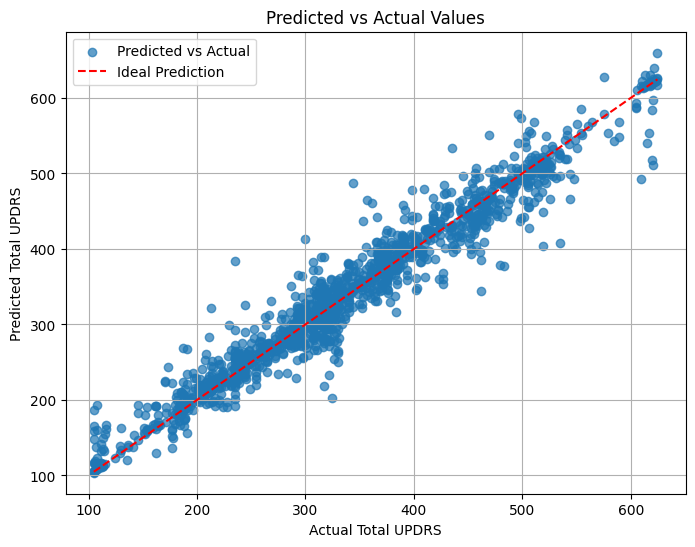

(694.1262730139789, 0.946078899525484)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Extract the mean and standard deviation for the target variable (total_UPDRS)
target_mean = train_data['total_UPDRS'].mean()
target_std = train_data['total_UPDRS'].std()

# Denormalize the predictions and actual values for meaningful evaluation
y_val_denorm = y_val_norm * target_std + target_mean
y_val_hats_denorm = y_val_hats * target_std + target_mean

# Calculate evaluation metrics
mse = mean_squared_error(y_val_denorm, y_val_hats_denorm)
r2 = r2_score(y_val_denorm, y_val_hats_denorm)

# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_val_denorm, y_val_hats_denorm, alpha=0.7, label='Predicted vs Actual')
plt.plot([y_val_denorm.min(), y_val_denorm.max()], [y_val_denorm.min(), y_val_denorm.max()], 
         color='red', linestyle='--', label='Ideal Prediction') # Ideal prediction line (y=x)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Total UPDRS')
plt.ylabel('Predicted Total UPDRS')
plt.legend()
plt.grid(True)
plt.show()

# Display the metrics
mse, r2


### Uncertainy

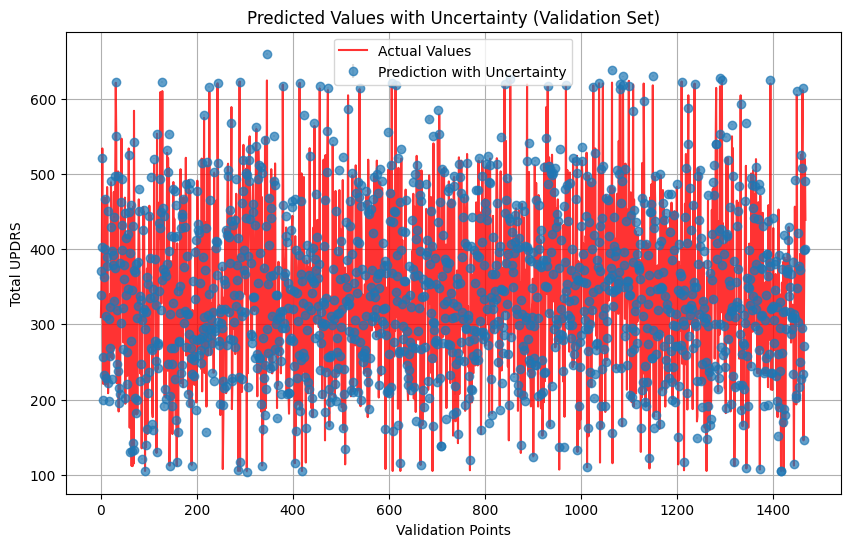

In [ ]:
# Plot predicted values along with uncertainty (error bars) # this shows the model is not very confident in its prediction
plt.figure(figsize=(10, 6))
plt.errorbar(
    range(len(y_val_denorm)),
    y_val_hats_denorm,
    yerr=2 * sigmas * target_std,  # Denormalize uncertainty values
    fmt='o',
    ecolor='lightgray',
    alpha=0.7,
    label='Prediction with Uncertainty'
)
plt.plot(range(len(y_val_denorm)), y_val_denorm, 'r-', label='Actual Values', alpha=0.8)
plt.title('Predicted Values with Uncertainty (Validation Set)')
plt.xlabel('Validation Points')
plt.ylabel('Total UPDRS')
plt.legend()
plt.grid(True)
plt.show()


### Hyperparameters Grid Search Optimization

In [ ]:
# Define the grid for hyperparameters
r2_values = [50, 100, 200]  # Example grid for r^2
s2_nu_values = [0.0001, 0.001, 0.01]  # Example grid for σ^2_ν

# Function to perform grid search
def grid_search_gpr(X_train, y_train, X_val, y_val, r2_values, s2_nu_values, N):
    """
    Perform grid search to optimize r^2 and σ^2_ν hyperparameters for GPR.
    """
    best_mse = float('inf')
    best_r2 = None
    best_s2_nu = None

    for r2 in r2_values:
        for s2_nu in s2_nu_values:
            # Perform predictions for the validation set with current hyperparameters
            y_val_hats, _ = gp_predictions_for_validation(X_train, y_train, X_val, r2, theta=1, s2_nu=s2_nu, N=N)
            
            # Denormalize predictions for MSE calculation
            y_val_hats_denorm = y_val_hats * target_std + target_mean
            y_val_denorm = y_val_norm * target_std + target_mean
            
            # Calculate MSE and R^2 score for the current hyperparameters
            mse = mean_squared_error(y_val_denorm, y_val_hats_denorm)
            
            # Update best hyperparameters if current MSE is lower
            if mse < best_mse:
                best_mse = mse
                best_r2 = r2
                best_s2_nu = s2_nu

    return best_r2, best_s2_nu, best_mse

# Perform the grid search
best_r2, best_s2_nu, best_mse = grid_search_gpr(X_train_norm, y_train_norm, X_val_norm, y_val_norm, r2_values, s2_nu_values, N)

# Display the best hyperparameters and corresponding MSE
best_r2, best_s2_nu, best_mse


(200, 0.001, 680.0329928194086)

### Test

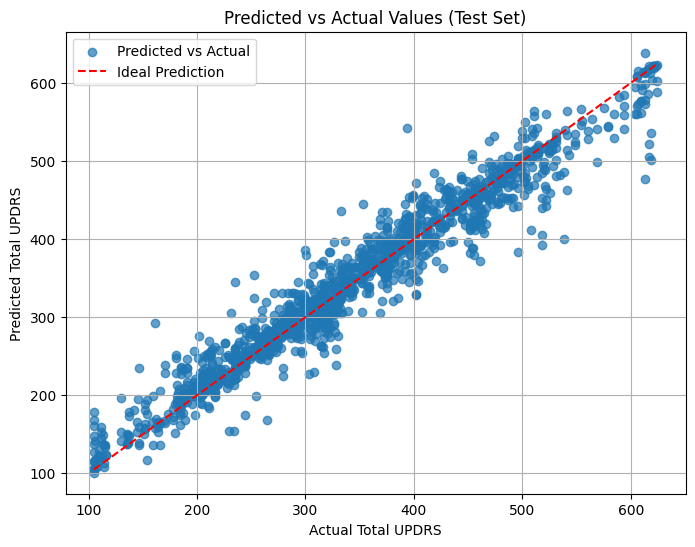

(741.4943476727751, 0.9443721703954288)

In [172]:
# Perform predictions on the test set using the optimized hyperparameters
y_test_hats, sigmas_test = gp_predictions_for_validation(
    X_train_norm, y_train_norm, X_test_norm, best_r2, theta=1, s2_nu=best_s2_nu, N=N
)

# Denormalize the predictions and actual values for meaningful evaluation
y_test_denorm = y_test_norm * target_std + target_mean
y_test_hats_denorm = y_test_hats * target_std + target_mean

# Calculate evaluation metrics on the test set
test_mse = mean_squared_error(y_test_denorm, y_test_hats_denorm)
test_r2 = r2_score(y_test_denorm, y_test_hats_denorm)

# Plot the predicted vs actual values for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test_denorm, y_test_hats_denorm, alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test_denorm.min(), y_test_denorm.max()], [y_test_denorm.min(), y_test_denorm.max()], 
         color='red', linestyle='--', label='Ideal Prediction')
plt.title('Predicted vs Actual Values (Test Set)')
plt.xlabel('Actual Total UPDRS')
plt.ylabel('Predicted Total UPDRS')
plt.legend()
plt.grid(True)
plt.show()

# Display test set metrics
test_mse, test_r2


### Error Distribution

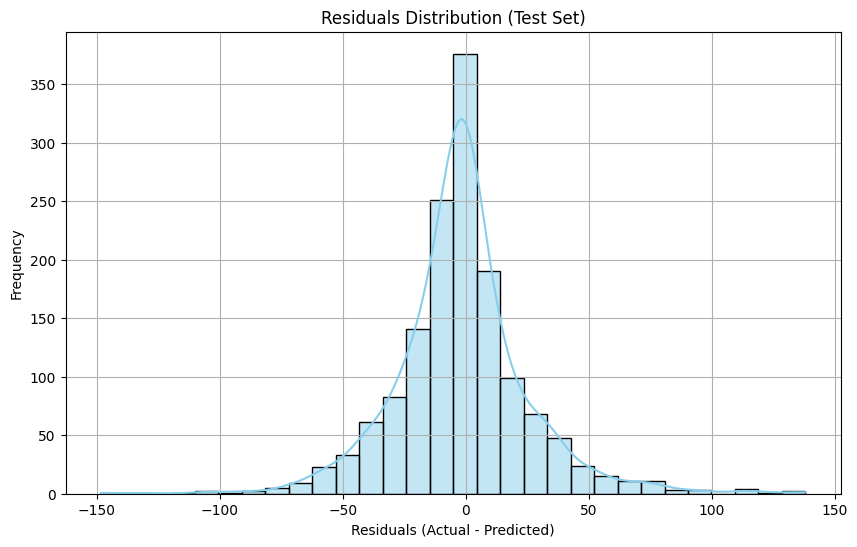

In [173]:
import seaborn as sns

# Calculate residuals for the test set
residuals = y_test_denorm - y_test_hats_denorm

# Create a heatmap of the residuals distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color="skyblue")
plt.title("Residuals Distribution (Test Set)")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


### Residuals

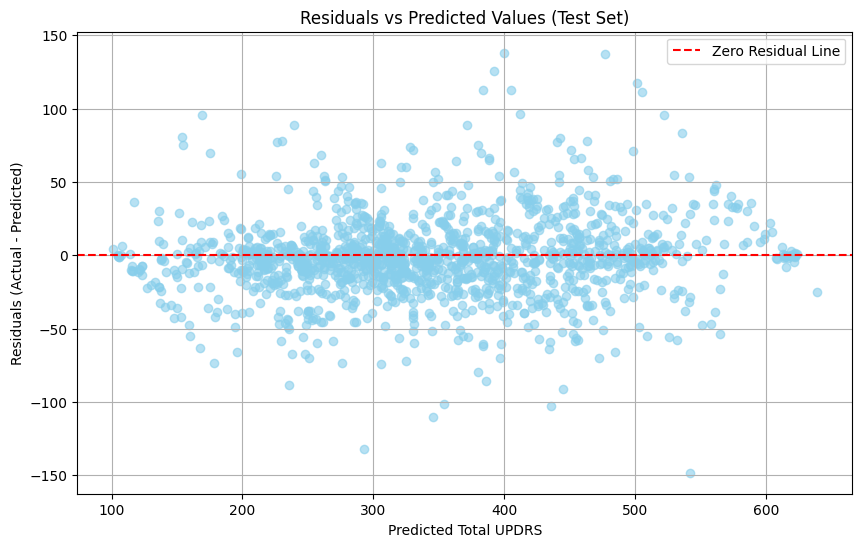

In [ ]:
# Plot residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_hats_denorm, residuals, alpha=0.6, color='skyblue') # Residuals vs Predicted values
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line') # Zero residual line (y=0) which is the ideal line
plt.title('Residuals vs Predicted Values (Test Set)')
plt.xlabel('Predicted Total UPDRS')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.grid(True)
plt.show()


### Cov

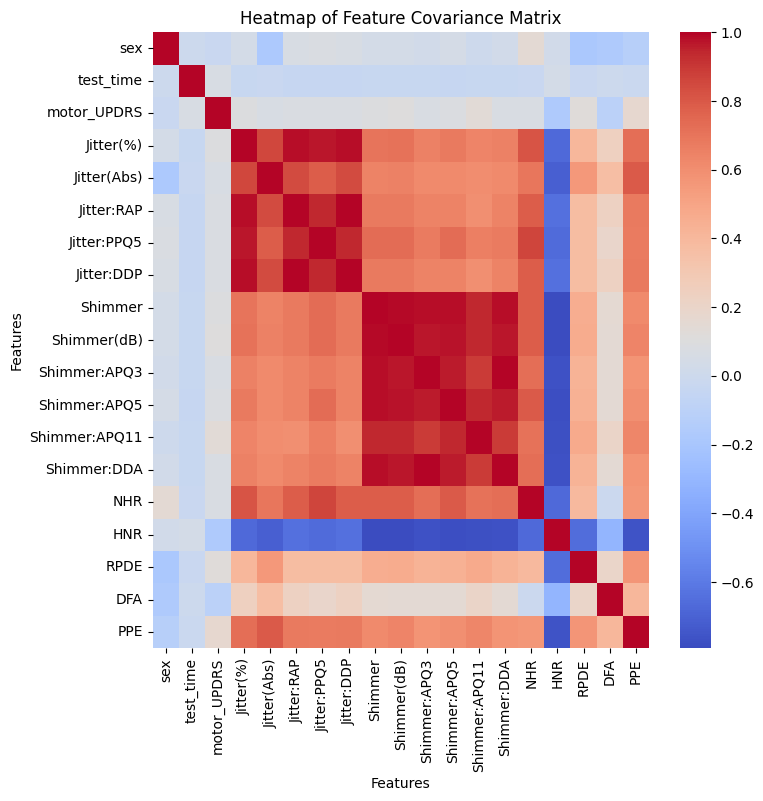

In [176]:
# Compute the covariance matrix for the training set features
cov_matrix = np.cov(X_train_norm, rowvar=False)

# Plot the heatmap of the covariance matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cov_matrix, annot=False, cmap="coolwarm", xticklabels=features, yticklabels=features)
plt.title('Heatmap of Feature Covariance Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()
